# Project: WeRateDogs Twitter Data Analysis

Hello and welcome to this dog analysis project. Enjoy

Goal: Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. 

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import tweepy
import time

from datetime import datetime

In [2]:
sns.set(rc={"figure.figsize":(15, 6)})

## Data Gathering

So there's 3 sources of data provided for this project and we're now going to begin fetching them.

The first one was made available as a CSV file. This archive file contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of WeRateDogs' tweets as they stood on August 1, 2017.


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Loading the csv file into a pandas DataFrame
archive = pd.read_csv('twitter-archive-enhanced.csv')

Now let's have a quick overview of what this looks like

In [4]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Next,  we have an Image Predictions tsv dataset that contains a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). It is on the internet, and so we shall access it with the requests library

#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('tweet image predictions.tsv', mode = 'wb') as file:
    file.write(response.content)


Read the tsv file into a pandas DataFrame, ensuring to signify that it's tab seperated

In [6]:
prediction = pd.read_csv('tweet image predictions.tsv', sep = '\t')
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


So this data contains information for 2017 tweets, okay.

#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Here' we're supposed to get the retweet count and favorite count data for each tweet and then save them together with the tweet ids as a txt file. Let's goo

This was the first time I was using tweepy so I had to install it with pip

In [8]:
# !pip install tweepy

# REMOVE Twitter API keys, secrets and tokens

Here, we import tweepy and put in my access keys

In [9]:
"""

import tweepy

consumer_key = '********************************************************'
consumer_secret = '*****************************************************'
access_token = '********************************************************'
access_secret = '*******************************************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


""";

In [10]:
#Extract the tweet ids
tweet_ids = archive['tweet_id']

tweet_ids

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

Here now is where we extract the retweet count and favorite count

In [11]:
"""

# Inititlize counter to monitor progress
#This was necessary because the process took a while and I wanted to see how far 
counter = 1
# Create a list to store successfully checked tweet_ids
tweet_id_index = []
# A list to store retweet counts
retweet_count = []
# A list to store favourite likes
favourite_like = []
# A list to store ids of tweets that were not found (may have been deleted)
unfound_ids = []
for tweet_id in tweet_ids:
    try:
        print(counter , " : ", tweet_id)
        counter +=1
        start = time.time()

        tweet = api.get_status(tweet_id)
        tweet_id_index.append(tweet_id)
        retweet_count.append(tweet._json['retweet_count'])
        favourite_like.append(tweet._json['favorite_count'])

        end = time.time()
    #print(end - start)
    except:
        # if any error comes up, append the tweet id to the ' unfound_ids '
        unfound_ids.append(tweet_id)
        continue
    
    """;

Here, we use the lists we extracted to make the dictionary which will be exported as 'tweet_json.txt' 

In [12]:
"""

tweet_json_dict = {
    'tweet ID': tweet_id_index,
    'retweet count': retweet_count,
    'favourite count': favourite_like
}
tweet_json = pd.DataFrame(tweet_json_dict)
tweet_json.head()

""";

Exportation. Here, I export the tweet_json made in the above cell to a txt file 'tweet_json.txt'

In [13]:
# tweet_json.to_json('tweet_json.txt')

Reimportation, lol. Let's see what it actually looks like

In [14]:
json_tweets = pd.read_json('tweet_json.txt')
json_tweets

,tweet ID,retweet count,favourite count
0,892420643555336193,6953,33636
1,892177421306343426,5259,29173
2,891815181378084864,3462,21947
3,891689557279858688,7172,36721
4,891327558926688256,7704,35113
...,...,...,...
2318,666049248165822465,36,88
2319,666044226329800704,114,246
2320,666033412701032449,36,100
2321,666029285002620928,39,112


Now that looks good

In [15]:
#This was gotten from the tweets info extraction code above. I'm storing it here 
#                                                            so that I will not have to run the code to retrieve it

unfound_ids = [888202515573088257,
 877611172832227328,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 863432100342583297,
 862722525377298433,
 861769973181624320,
 856602993587888130,
 856330835276025856,
 851953902622658560,
 851861385021730816,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 766864461642756096,
 759923798737051648,
 759566828574212096,
 754011816964026368,
 680055455951884288,
 670786190031921152]

## Assessing Data

Alright, let's look for issues with these 3 datasets. I used microsoft excel for visual assessment and found quite a few interesting stuff.




In [16]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet ID         2323 non-null   int64
 1   retweet count    2323 non-null   int64
 2   favourite count  2323 non-null   int64
dtypes: int64(3)
memory usage: 72.6 KB


In [18]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
pd.to_datetime(archive['timestamp'])

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

In [21]:
#To display tweets that are retweets
archive[archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [22]:
archive['in_reply_to_status_id'].notnull().sum()

78

In [23]:
#To display tweets which are not ratings
archive[~archive['text'].str.contains('10')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


### Quality issues

1. in the archive data, many dog names that are written as  one of these are actually supposed to be 'None', because the dog names weren't specified: 

       ['a', 'actually', 'all', 'an', 'by', 'his', 'life', 'light', 'mad', 'my', 'not', 'old', 'one', 'quite', 'space', 'the', 'this', 'unacceptable', 'very']

2. The 'timestamp' and 'retweeted_status_timestamp' columns have a wrong datatype (object instead of datetime). The tweet_id column should also be a string object

 3 - 4 . Wrong rating numerator
 

3. in the archive data, the tweet with ID 832215909146226, numerator is 75 instead of 9.75

4. in the archive data, the tweet with ID 667550882905632, numerator is 5 instead of -5

 5 - 7. Wrong Numerator AND Denominator
 

5. in the archive data, the tweet with ID 722974582966214, numerator is 4 and denominator is 20, instead of 13/10

6. in the archive data, the tweet with ID 775096608509886, numerator is 9 and denominator is 11, instead of 14/10

7. in the archive data, the tweet with ID 666287406224695, numerator is 1 and denominator is 2, instead of 9/10

 8 - 9. Only part of dog names gotten
 

8. in the archive data, the tweet with ID 775096608509886, the dog's actual name is O'Malley, but it's written as just 'O'

9. in the archive data, the tweet with ID 770414278348247, the dog's actual name is Al Cabone, but it's written as just 'Al'

 10 - 14. Dog name totally wrong
 

10. in the archive data, the tweet with ID 765395769549590, the dog's actual name is Zoey, but it's written as 'my'

11.  in the archive data, the tweet with ID 748977405889503, there's no dog, so the name should be 'None', not "not"

12. in the archive data, the tweet with ID 748692773788876, the dog's actual name is Quizno, but it's written as just 'his'

13. in the archive data, the tweet with ID 671743150407421, the dog's actual name is Jacob, but it's written as just 'a'

14. in the archive data, the tweet with ID 667177989038297, the dog's actual name is Daryl, but it's written as just 'a'

 15-17. Dog name wrongly said to be 'None'

15. in the archive data, the tweet with ID 775096608509886, the dog's actual name is Bretagne, but it's written as 'None'

16. in the archive data, the tweet with ID 856526610513747, the dog's actual name is CHARLIE, but it's written as 'None'

17. in the archive data, the tweet with ID 675870721063669, the dog's actual name is Yoshi, but it's written as 'None'


18. For all the tweets that contain the text 'named', the names were identified wrongly. The actual names are the words that come just after 'named' in the tweets. The exception is the one that contains "Named", starting with capital letters. The name of that one is Wilson

19. There are 181 rows that are about data which are retweets

For the ones that have name correction issues, create a dictionary with the keys Tweet_id and Actual_Name, then the values should be a list of the tweet_Ids and the corresponding Actual_Name s

e.g

In [24]:
actual_dog_names = {
     'tweet_id' : [775096608509886, 770414278348247, 765395769549590, 748977405889503, 748692773788876, 671743150407421],
     'Actual_name' : ["O'Malley", "Al Cabone", "Zoey", "None", "Quizno", "Jacob"]
     
 }

In [25]:
actual_dog_names['tweet_id'][0]

775096608509886

In [26]:
archive['tweet_id'].astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object

In [27]:
archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Oreo          1
Maxwell       1
Jameson       1
Stuart        1
Snickers      1
Name: name, Length: 957, dtype: int64

In [28]:
archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

### Tidiness issues
1. The data in tweet_json.txt should be part of the archive table

2. Each dog type makes a column

# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
archive_copy = archive.copy()
json_tweets_copy = json_tweets.copy()

   ## Quality Issues

### Issue #1: in the archive data, many dog names that are written as one of these are actually supposed to be 'None', because the dog names weren't specified:

['a', 'actually', 'all', 'an', 'by', 'his', 'life',
                   'light', 'mad', 'my', 'not', 'old', 'one', 'quite',
                   'space', 'the', 'this', 'unacceptable', 'very']

#### Define: Replace all values in the name column that are in this list, with 'None'

#### Code

In [30]:
archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Oreo          1
Maxwell       1
Jameson       1
Stuart        1
Snickers      1
Name: name, Length: 957, dtype: int64

In [31]:
unwanted_names = ['a', 'actually', 'all', 'an', 'by', 'his', 'life',
                   'light', 'mad', 'my', 'not', 'old', 'one', 'quite',
                   'space', 'the', 'this', 'unacceptable', 'very']

In [32]:
archive['name'][archive['name'].isin(unwanted_names)]

56          a
118     quite
169     quite
193     quite
335       not
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 99, dtype: object

In [33]:
none_name_rows = archive['name'][archive['name'].isin(unwanted_names)].index.tolist()
print(none_name_rows)

[56, 118, 169, 193, 335, 369, 649, 682, 759, 773, 801, 819, 852, 924, 988, 992, 993, 1002, 1004, 1017, 1025, 1031, 1040, 1049, 1095, 1097, 1120, 1121, 1138, 1193, 1206, 1207, 1340, 1351, 1361, 1362, 1368, 1382, 1385, 1499, 1527, 1603, 1693, 1724, 1737, 1785, 1797, 1815, 1853, 1854, 1877, 1878, 1916, 1923, 1936, 1941, 1955, 1994, 2001, 2030, 2034, 2037, 2066, 2116, 2125, 2128, 2146, 2153, 2161, 2191, 2198, 2204, 2211, 2212, 2218, 2222, 2235, 2249, 2255, 2264, 2273, 2287, 2304, 2311, 2314, 2326, 2327, 2333, 2334, 2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354]


In [34]:
archive.loc[none_name_rows, 'name'] = 'None'

#### Test

In [35]:
archive['name'].value_counts()

None        844
Charlie      12
Cooper       11
Oliver       11
Lucy         11
           ... 
Maxwell       1
Jameson       1
Stuart        1
Crawford      1
Ester         1
Name: name, Length: 938, dtype: int64

### Issue #2: The 'timestamp' and 'retweeted_status_timestamp' columns have a wrong datatype (object instead of datetime). The tweet_id column should also be a string object.

   #### Define: Change the datatype of 'timestamp' and 'retweeted_status_timestamp' columns to datetime and change 'tweet_id' to string

#### Code

#### Code

In [36]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [37]:
for column in ['retweeted_status_timestamp', 'timestamp']:
    archive[column] = pd.to_datetime(archive[column])

In [38]:
archive['tweet_id'] = archive['tweet_id'].astype(str)

 #### Test

In [39]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

Alright, so for my visual assessment, I used microsoft excel, and in my display, the tweet_id column displayed the tweets without the last 3 figures (it made them all zeroes). So I created this function to help me cut out the last 3 figures of the tweet_ids here in the notebook, so that I would identify them easily (they would then be the exact samething)

In [40]:
def get_id(series):
    series = series.apply(lambda x: x[:-3])
    return series

### Issues #3 and #4: Wrong rating numerator

   #### Define: REPLACE The numerator value with the right thing

#### Code

in the archive data, the tweet with ID 832215909146226, numerator is 75 instead of 9.75

in the archive data, the tweet with ID 667550882905632, numerator is 5 instead of -5

In [41]:
archive[get_id(archive['tweet_id']).isin(['832215909146226', '667550882905632'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56+00:00,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59+00:00,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


In [42]:
archive[get_id(archive['tweet_id']).isin(['832215909146226', '667550882905632'])].index.tolist()

[340, 2260]

In [43]:
archive.loc[[340, 2260], 'rating_numerator'].values

array([75,  5], dtype=int64)

In [44]:
archive.loc[[340, 2260], 'rating_numerator'] = np.array([9.75, -5])

#### Test

In [45]:
archive.loc[[340, 2260], 'rating_numerator'].values

array([ 9.75, -5.  ])

In [46]:
archive[get_id(archive['tweet_id']).isin(['832215909146226', '667550882905632'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56+00:00,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59+00:00,https://twitter.com/dogratingrating/status/667...,-5.00,10,None,None,None,None,None


### Issues #5 - #7:  Wrong Numerator AND Denominator

   #### Define: REPLACE The numerator and denominator values with the right thing

5. in the archive data, the tweet with ID 775096608509886, numerator is 9 and denominator is 11, instead of 14/10

6. in the archive data, the tweet with ID 722974582966214, numerator is 4 and denominator is 20, instead of 13/10

7. in the archive data, the tweet with ID 666287406224695, numerator is 1 and denominator is 2, instead of 9/10


#### Code

In [47]:
archive[get_id(archive['tweet_id']).isin(['722974582966214', '775096608509886', '666287406224695'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38+00:00,https://twitter.com/dog_rates/status/740373189...,9.0,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/722974582...,4.0,20,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,1.0,2,None,None,None,None,None


In [48]:
archive[get_id(archive['tweet_id']).isin(['722974582966214', '775096608509886', '666287406224695'])].index.tolist()

[784, 1165, 2335]

In [49]:
archive.loc[[784, 1165, 2335], ['rating_numerator', 'rating_denominator']].values

array([[ 9., 11.],
       [ 4., 20.],
       [ 1.,  2.]])

In [50]:
archive.loc[[784, 1165, 2335], 'rating_numerator'] = np.array([14, 13, 9])

In [51]:
archive.loc[[784, 1165, 2335], 'rating_denominator'] = np.array([10]*3)

#### Test

In [52]:
archive[get_id(archive['tweet_id']).isin(['722974582966214', '775096608509886', '666287406224695'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38+00:00,https://twitter.com/dog_rates/status/740373189...,14.0,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/722974582...,13.0,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666287406...,9.0,10,None,None,None,None,None


### Issues  #8 - #9. Only part of dog names gotten

   #### Define: Change the dogs names to the correct things

8. in the archive data, the tweet with ID 776201521193218, the dog's actual name is O'Malley, but it's written as just 'O'

9. in the archive data, the tweet with ID 770414278348247, the dog's actual name is Al Cabone, but it's written as just 'Al'


In [53]:
archive[get_id(archive['tweet_id']).isin(['776201521193218', '770414278348247'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/776201521...,10.0,10,O,None,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/770414278...,11.0,10,Al,None,None,None,None


In [54]:
archive[get_id(archive['tweet_id']).isin(['776201521193218', '770414278348247'])].index.tolist()

[775, 820]

In [55]:
archive.loc[[775, 820], ['name']].values

array([['O'],
       ['Al']], dtype=object)

In [56]:
archive.loc[[775, 820], ['name']] = ["O'Malley", "Al Cabone"]

#### Test

In [57]:
archive[get_id(archive['tweet_id']).isin(['776201521193218', '770414278348247'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/776201521...,10.0,10,O'Malley,None,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/770414278...,11.0,10,Al Cabone,None,None,None,None


### Issues #10 - #14:  Dog name totally wrong

   #### Define: REPLACE The wrong names with the right things

10. in the archive data, the tweet with ID 765395769549590, the dog's actual name is Zoey, but it's written as 'my'

11.  in the archive data, the tweet with ID 748977405889503, there's no dog, so the name should be 'None', not "not"

12. in the archive data, the tweet with ID 748692773788876, the dog's actual name is Quizno, but it's written as just 'his'

13. in the archive data, the tweet with ID 671743150407421, the dog's actual name is Jacob, but it's written as just 'a'

14. in the archive data, the tweet with ID 667177989038297, the dog's actual name is Daryl, but it's written as just 'a'

#### Code

In [58]:
archive[get_id(archive['tweet_id']).isin(['765395769549590', '748977405889503', '748692773788876', '671743150407421', '667177989038297'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/765395769...,13.0,10,None,None,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/748977405...,10.0,10,None,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/748692773...,10.0,10,None,doggo,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671743150...,11.0,10,None,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667177989...,8.0,10,None,None,None,None,None


In [59]:
archive[get_id(archive['tweet_id']).isin(['765395769549590', '748977405889503', '748692773788876', '671743150407421', '667177989038297'])].index.tolist()

[852, 988, 992, 2034, 2287]

In [60]:
archive.loc[[852, 988, 992, 2034, 2287], 'name'].values

array(['None', 'None', 'None', 'None', 'None'], dtype=object)

In [61]:
archive.loc[[852, 988, 992, 2034, 2287], 'name'] = ['Zoey', 'None', 'Quizno', 'Jacob', 'Daryl']

#### Test

In [62]:
archive[get_id(archive['tweet_id']).isin(['765395769549590', '748977405889503', '748692773788876', '671743150407421', '667177989038297'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/765395769...,13.0,10,Zoey,None,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/748977405...,10.0,10,None,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/748692773...,10.0,10,Quizno,doggo,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671743150...,11.0,10,Jacob,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667177989...,8.0,10,Daryl,None,None,None,None


### Issues #15-17: Dog name wrongly said to be 'None'

   #### Define: REPLACE The wrong names with the right things


15. in the archive data, the tweet with ID 856526610513747, the dog's actual name is CHARLIE, but it's written as 'None'

16. in the archive data, the tweet with ID 775096608509886, the dog's actual name is Bretagne, but it's written as 'None'

17. in the archive data, the tweet with ID 675870721063669, the dog's actual name is Yoshi, but it's written as 'None'


#### Code

In [63]:
archive[get_id(archive['tweet_id']).isin(['856526610513747', '775096608509886', '675870721063669'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/856526610...,14.0,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38+00:00,https://twitter.com/dog_rates/status/740373189...,14.0,10,None,None,None,None,None
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",&amp; this is Yoshi. Another world record cont...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675870721...,11.0,10,None,None,None,None,None


In [64]:
archive[get_id(archive['tweet_id']).isin(['856526610513747', '775096608509886', '675870721063669'])].index.tolist()

[184, 784, 1842]

In [65]:
archive.loc[[184, 784, 1842], 'name'].values

array(['None', 'None', 'None'], dtype=object)

In [66]:
archive.loc[[184, 784, 1842], 'name'] = ['CHARLIE', 'Bretagne', 'Yoshi']

#### Test

In [67]:
archive[get_id(archive['tweet_id']).isin(['856526610513747', '775096608509886', '675870721063669'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/856526610...,14.0,10,CHARLIE,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38+00:00,https://twitter.com/dog_rates/status/740373189...,14.0,10,Bretagne,None,None,None,None
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",&amp; this is Yoshi. Another world record cont...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675870721...,11.0,10,Yoshi,None,None,None,None


### Issue #18.

### For all the tweets that contain the text 'named', the names were identified wrongly. The actual names                          are the words that come just after 'named' in the tweets. The exception is the one that contains                                  "Named", starting with capital letters. The name of that one is Wilson

   #### Define: Identify the tweets containing the text 'named, extract the dog names and then correct the  column

#### Code

In [68]:
named_names_df = archive[archive['text'].str.contains('named')]
named_names_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This a Norwegian Pewterschmidt ...,6.675094e+17,4.196984e+09,2015-11-20 01:06:48+00:00,https://twitter.com/dog_rates/status/667509364...,12.0,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675706639...,10.0,10,None,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/673636718...,10.0,10,None,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671743150...,11.0,10,Jacob,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671147085...,9.0,10,None,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670427002...,9.0,10,None,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670361874...,9.0,10,None,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670303360...,9.0,10,None,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669923323...,10.0,10,None,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/669564461...,10.0,10,None,None,None,None,None


Now Jacob seems to be correct because we earlier corrected it, under some other issue [10 - 14. Dog name totally wrong]

In [69]:
named_names_df['text']

603     RT @dog_rates: This a Norwegian Pewterschmidt ...
1853    This is a Sizzlin Menorah spaniel from Brookly...
1955    This is a Lofted Aphrodisiac Terrier named Kip...
2034    This is a Tuscaloosa Alcatraz named Jacob (Yac...
2066    This is a Helvetica Listerine named Rufus. Thi...
2116    This is a Deciduous Trimester mix named Spork....
2125    This is a Rich Mahogany Seltzer named Cherokee...
2128    This is a Speckled Cauliflower Yosemite named ...
2146    This is a spotted Lipitor Rumpelstiltskin name...
2161    This is a Coriander Baton Rouge named Alfredo....
2166    Here we have a Gingivitis Pumpernickel named Z...
2191    This is a Slovakian Helter Skelter Feta named ...
2204    This is an Irish Rigatoni terrier named Berta....
2218    This is a Birmingham Quagmire named Chuk. Love...
2227    Here we have an Azerbaijani Buttermilk named G...
2235    This is a Trans Siberian Kellogg named Alfonso...
2249    This is a Shotokon Macadamia mix named Cheryl....
2255    This i

In [70]:
named_names_index = named_names_df.index.tolist()
print(named_names_index)

[603, 1853, 1955, 2034, 2066, 2116, 2125, 2128, 2146, 2161, 2166, 2191, 2204, 2218, 2227, 2235, 2249, 2255, 2264, 2269, 2273, 2304, 2311, 2314]


In [71]:
named_names = named_names_df['text'].str.extract(r"named (\w+)").values

In [72]:
named_names

array([['Tickles'],
       ['Wylie'],
       ['Kip'],
       ['Jacob'],
       ['Rufus'],
       ['Spork'],
       ['Cherokee'],
       ['Hemry'],
       ['Alphred'],
       ['Alfredo'],
       ['Zeus'],
       ['Leroi'],
       ['Berta'],
       ['Chuk'],
       ['Guss'],
       ['Alfonso'],
       ['Cheryl'],
       ['Jessiga'],
       ['Klint'],
       ['Tickles'],
       ['Kohl'],
       ['Pepe'],
       ['Octaviath'],
       ['Johm']], dtype=object)

In [73]:
archive.loc[named_names_index, 'name'] = named_names

#### Test

In [74]:
archive[archive['text'].str.contains('named')][['text', 'name']]

,text,name
603,RT @dog_rates: This a Norwegian Pewterschmidt ...,Tickles
1853,This is a Sizzlin Menorah spaniel from Brookly...,Wylie
1955,This is a Lofted Aphrodisiac Terrier named Kip...,Kip
2034,This is a Tuscaloosa Alcatraz named Jacob (Yac...,Jacob
2066,This is a Helvetica Listerine named Rufus. Thi...,Rufus
2116,This is a Deciduous Trimester mix named Spork....,Spork
2125,This is a Rich Mahogany Seltzer named Cherokee...,Cherokee
2128,This is a Speckled Cauliflower Yosemite named ...,Hemry
2146,This is a spotted Lipitor Rumpelstiltskin name...,Alphred
2161,This is a Coriander Baton Rouge named Alfredo....,Alfredo


### Issue #19: There are 181 rows that are about data which are retweets

   #### Define: Drop rows where the retweet status ids are not null

#### Code

In [75]:
print(len(archive))

2356


In [76]:
archive = archive[archive['retweeted_status_id'].isnull()]

#### Test

In [77]:
len(archive)

2175

# Tidyness Issues

### Issue #1: The data in tweet_json.txt should be part of the archive table

#### Define: Merge the json_tweets and archive DataFrames on the column 'tweet ID'

#### Code

In [78]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

In [79]:
archive['tweet_id']= archive['tweet_id'].astype('int64')

In [80]:
json_tweets.shape

(2323, 3)

In [81]:
archive.shape

(2175, 17)

In [82]:
archive = archive.merge(json_tweets, how = 'left', left_on = 'tweet_id', right_on = 'tweet ID')
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet ID,retweet count,favourite count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8.924206e+17,6953.0,33636.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,8.921774e+17,5259.0,29173.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,8.918152e+17,3462.0,21947.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,8.916896e+17,7172.0,36721.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,8.913276e+17,7704.0,35113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,None,None,None,None,6.660492e+17,36.0,88.0
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,None,None,None,None,6.660442e+17,114.0,246.0
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,None,None,None,None,6.660334e+17,36.0,100.0
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,None,None,None,None,6.660293e+17,39.0,112.0


Remove the second tweet id column brought in through the merge

In [83]:
archive = archive.drop(columns = 'tweet ID')
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet count,favourite count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,6953.0,33636.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,5259.0,29173.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,3462.0,21947.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,7172.0,36721.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,7704.0,35113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,None,None,None,None,36.0,88.0
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,None,None,None,None,114.0,246.0
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,None,None,None,None,36.0,100.0
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,None,None,None,None,39.0,112.0


In [84]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet count', 'favourite count'],
      dtype='object')

In [85]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet count', 'favourite count'],
      dtype='object')

#### Test

In [86]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet count,favourite count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,6953.0,33636.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,5259.0,29173.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,3462.0,21947.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,7172.0,36721.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,7704.0,35113.0


### Issue #2: Each dog type makes a column

   #### Define: Create a new column that contains each dog's type and drop the other columns

#### Code

In [87]:
archive.loc[:, ['doggo', 'floofer', 'pupper', 'puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2170,None,None,None,None
2171,None,None,None,None
2172,None,None,None,None
2173,None,None,None,None


In [88]:
archive.iloc[:, -4:]

,pupper,puppo,retweet count,favourite count
0,None,None,6953.0,33636.0
1,None,None,5259.0,29173.0
2,None,None,3462.0,21947.0
3,None,None,7172.0,36721.0
4,None,None,7704.0,35113.0
...,...,...,...,...
2170,None,None,36.0,88.0
2171,None,None,114.0,246.0
2172,None,None,36.0,100.0
2173,None,None,39.0,112.0


In [89]:
archive['doggo'][archive['doggo'] == 'doggo']

9       doggo
40      doggo
89      doggo
97      doggo
98      doggo
        ...  
939     doggo
963     doggo
978     doggo
998     doggo
1026    doggo
Name: doggo, Length: 87, dtype: object

In [90]:
doggo_ids = archive['doggo'][archive['doggo'] == 'doggo'].index.tolist()
print(doggo_ids)

[9, 40, 89, 97, 98, 108, 149, 165, 172, 206, 213, 255, 268, 272, 279, 286, 288, 289, 295, 304, 305, 313, 324, 325, 328, 330, 355, 357, 360, 367, 373, 374, 382, 403, 407, 413, 415, 442, 467, 474, 475, 481, 482, 495, 502, 561, 567, 585, 588, 591, 593, 603, 629, 631, 653, 674, 678, 694, 711, 715, 722, 730, 743, 748, 753, 770, 771, 774, 781, 792, 802, 810, 814, 817, 853, 862, 873, 885, 897, 901, 925, 935, 939, 963, 978, 998, 1026]


In [91]:
archive['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [92]:
archive['floofer'][archive['floofer'] == 'floofer']

43      floofer
172     floofer
479     floofer
624     floofer
809     floofer
846     floofer
913     floofer
932     floofer
1355    floofer
1435    floofer
Name: floofer, dtype: object

In [93]:
floofer_ids = archive['floofer'][archive['floofer'] == 'floofer'].index.tolist()
floofer_ids

[43, 172, 479, 624, 809, 846, 913, 932, 1355, 1435]

In [94]:
archive['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [95]:
pupper_ids = archive['pupper'][archive['pupper'] == 'pupper'].index.tolist()
print(pupper_ids)

[28, 46, 53, 75, 84, 88, 96, 119, 171, 189, 214, 249, 253, 257, 278, 296, 319, 339, 352, 371, 382, 395, 399, 428, 439, 442, 444, 460, 467, 474, 478, 489, 507, 540, 567, 593, 605, 616, 617, 623, 626, 637, 641, 648, 690, 719, 722, 746, 752, 776, 781, 783, 787, 789, 791, 798, 806, 821, 825, 830, 863, 871, 875, 879, 881, 885, 889, 898, 917, 918, 922, 926, 935, 944, 960, 961, 964, 965, 974, 979, 982, 990, 995, 999, 1014, 1019, 1023, 1059, 1064, 1071, 1084, 1100, 1125, 1128, 1142, 1148, 1151, 1155, 1161, 1164, 1169, 1170, 1176, 1178, 1181, 1188, 1197, 1200, 1203, 1211, 1212, 1216, 1222, 1231, 1249, 1250, 1262, 1265, 1266, 1270, 1278, 1279, 1285, 1288, 1297, 1299, 1304, 1308, 1310, 1313, 1314, 1319, 1352, 1357, 1362, 1372, 1373, 1376, 1381, 1384, 1389, 1392, 1396, 1400, 1405, 1407, 1410, 1411, 1415, 1421, 1424, 1427, 1429, 1430, 1436, 1438, 1445, 1446, 1449, 1461, 1467, 1468, 1473, 1474, 1478, 1479, 1481, 1485, 1491, 1503, 1504, 1505, 1506, 1518, 1526, 1534, 1538, 1539, 1541, 1544, 1553, 1554

In [96]:
puppo_ids = archive['puppo'][archive['puppo'] == 'puppo'].index.tolist()
print(puppo_ids)

[12, 14, 67, 86, 115, 146, 165, 334, 336, 348, 366, 459, 468, 518, 534, 554, 564, 575, 596, 751, 773, 786, 858, 870, 905]


Create a new column for the dog names

In [97]:
archive['dog_type'] = pd.Series(list(np.zeros(len(archive))))

In [98]:
archive.loc[doggo_ids, 'dog_type'] = 'doggo'
archive.loc[floofer_ids, 'dog_type'] = 'floofer'
archive.loc[pupper_ids, 'dog_type'] = 'pupper'
archive.loc[puppo_ids, 'dog_type'] = 'puppo'

In [99]:
archive['dog_type'].unique()

array([0.0, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [100]:
archive['dog_type'].replace(0.0, 'None', inplace = True)

In [101]:
archive['dog_type'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_type, dtype: int64

Drog old dog name columns

In [102]:
archive.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

Note: There's nothing special about 9-14, I just wanted to show at least 3 different dog types to confirm the change was made

In [103]:
archive.iloc[9:14, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet count,favourite count,dog_type
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,6052.0,27801.0,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,6101.0,26904.0,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889880896...,13.0,10,Bruno,4129.0,24436.0,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,13.0,10,None,8286.0,41778.0,puppo
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,3692.0,23537.0,None


I moved this quality issue here because I wanted to deal with it last, as dealing with it earlier would have messed unwantedly with some of the code after it

### Issue #19: There are 181 rows that are about data which are retweets

   #### Define: Drop rows where the 'retweet status id' is not null

#### Code

In [104]:
print(len(archive))

2175


In [105]:
archive = archive[archive['retweeted_status_id'].isnull()]

#### Test

In [106]:
len(archive)

2175

## Creating a master dataset

Here, we create a DataFrame made up of all 3 of the original data

In [107]:
prediction.shape

(2075, 12)

In [108]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [109]:
archive = archive.merge(prediction, how = 'left', on = 'tweet_id')

In [110]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

## Storing Data
Here, we export the cleaned tweets data to a CSV file named "twitter_archive_master.csv".

In [111]:
archive.to_csv("twitter_archive_master.csv", index = None)

## Analyzing and Visualizing Data


Let's make a function to plot some nice bar graphs

In [112]:
def age_compare_bar(series = None, figures = 2, add_annotate = '', xlabel = None, ylabel = None, title = None):
    plt.subplots(figsize = (15,6))
    y = list(range(len(series)))
    plt.barh(y = y, width = series, tick_label = series.index)
    for position in y:
        plt.annotate(str(round(series[position], figures))+ add_annotate, xy=(series[position]+ 10,y[position]))
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.show()

 # What percentage of tweets had no names mentioned?

In [113]:
archive['name'].value_counts()

None         747
Lucy          11
Charlie       11
Oliver        10
Cooper        10
            ... 
Bonaparte      1
Bert           1
Willy          1
Pilot          1
Loomis         1
Name: name, Length: 960, dtype: int64

Let's rename the values that are not None to signify that a name was given

In [114]:
archive[archive['name'] != 'None']['name'].apply(lambda x: 'Name given')

0       Name given
1       Name given
2       Name given
3       Name given
4       Name given
           ...    
2134    Name given
2136    Name given
2137    Name given
2138    Name given
2144    Name given
Name: name, Length: 1428, dtype: object

In [115]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

### Visualization

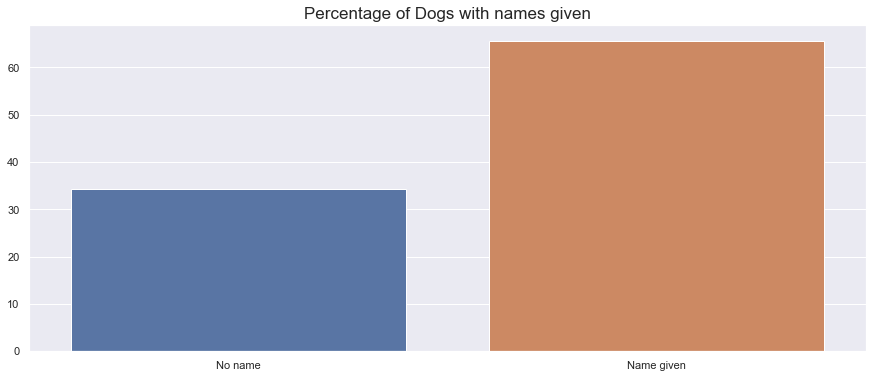

In [116]:
sns.barplot(x = ['No name', 'Name given'],
           y = [archive['name'].value_counts()[0] * 100/len(archive),
                archive['name'].value_counts()[1:].sum() * 100/len(archive)],
           )
sns.set()
plt.title('Percentage of Dogs with names given', fontsize = 17);

In [117]:
print(f"""
Percentage of Dogs with names given: {(archive['name'].value_counts()[1:].sum()  * 100/len(archive)).round(3)} %
Percentage of Dogs without names given: {(archive['name'].value_counts()[0]  * 100/len(archive)).round(3)} %
        """)


Percentage of Dogs with names given: 65.655 %
Percentage of Dogs without names given: 34.345 %
        


# What are the most popular dog ratings?

### Visualization

In [118]:
archive['rating_numerator'] = archive['rating_numerator'].astype(str)

In [119]:
(archive['rating_numerator']
 .value_counts(ascending = False , normalize = True)
 .head(10) * 100).apply(lambda x: str(round(x)) + '%')

12.0    23%
10.0    20%
11.0    20%
13.0    14%
9.0      7%
8.0      5%
7.0      2%
14.0     2%
5.0      2%
6.0      1%
Name: rating_numerator, dtype: object

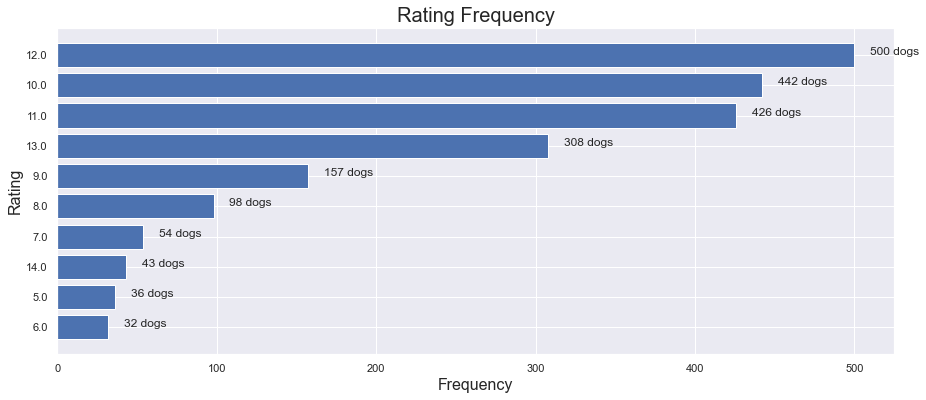

In [120]:
age_compare_bar(series = archive['rating_numerator'].value_counts(ascending = True).tail(10),
                xlabel = 'Frequency',
                ylabel = 'Rating',
                title = 'Rating Frequency', add_annotate = ' dogs')

# What were the most frequent dog types?

In [121]:
archive['dog_type'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_type, dtype: int64

### Visualization

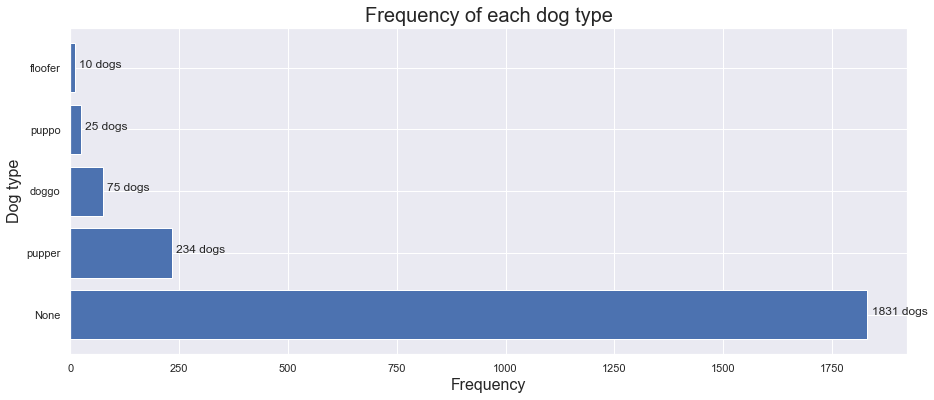

In [122]:
age_compare_bar(series = archive['dog_type'].value_counts(),
                xlabel = 'Frequency',
                ylabel = 'Dog type',
                title = 'Frequency of each dog type', add_annotate = ' dogs')

In [123]:
75+25+10+234

344

In [124]:
234/344

0.6802325581395349

In [125]:
print(f"""
Percentage of Dogs with IDENTIFIED TYPES which were puppos: {round(100*234 / (75+25+10+234))} %
        """)


Percentage of Dogs with IDENTIFIED TYPES which were puppos: 68 %
        


# Which dog type had the highest number of average retweets?

In [126]:
archive['retweet count']

0       6953.0
1       5259.0
2       3462.0
3       7172.0
4       7704.0
         ...  
2170      36.0
2171     114.0
2172      36.0
2173      39.0
2174     418.0
Name: retweet count, Length: 2175, dtype: float64

### Visualization

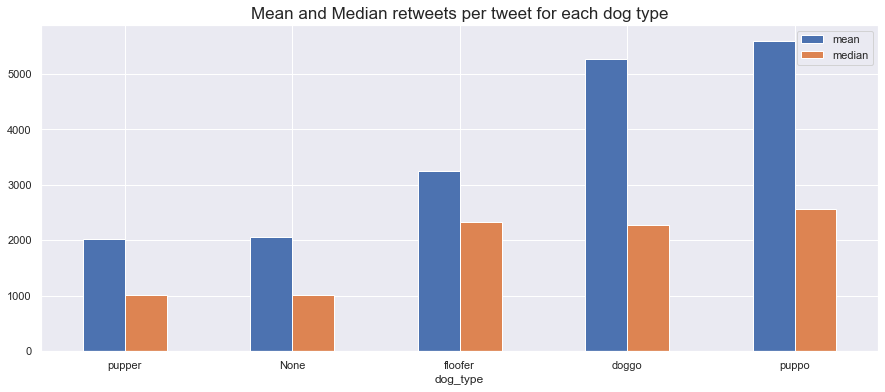

In [127]:
archive.groupby('dog_type')['retweet count'].aggregate(['mean', 'median']).sort_values(by = 'mean').plot(kind = 'bar')
plt.title('Mean and Median retweets per tweet for each dog type', fontsize = 17)
plt.xticks(rotation = 0);

In [128]:
(archive.groupby('dog_type')['retweet count']
 .aggregate(['count', 'mean', 'median'])
 .sort_values(by = 'mean', ascending = False).head())

,count,mean,median
dog_type,,,
puppo,25,5599.680000,2568.0
doggo,74,5262.202703,2284.0
floofer,10,3257.200000,2324.0
None,1821,2068.472817,1009.0
pupper,234,2026.688034,1005.5


In [129]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
retweet count                   11
favourite count                 11
dog_type                         0
jpg_url                        181
img_num                        181
p1                             181
p1_conf                        181
p1_dog                         181
p2                             181
p2_conf                        181
p2_dog                         181
p3                             181
p3_conf                        181
p3_dog                         181
dtype: int64

11 tweets have zero retweets (i.e, null values). Let's see what dog types those tweets are of

In [130]:
archive.sort_values(by = 'retweet count', ascending  = False).tail(12)[['dog_type', 'retweet count']]

,dog_type,retweet count
247,None,1.0
93,None,NaN
129,None,NaN
134,None,NaN
217,None,NaN
252,None,NaN
305,doggo,NaN
606,None,NaN
720,None,NaN
760,None,NaN


The only tweet with an identified dog type, with no retweets at all, was a tweet about a doggo.

### Visualization

# Which dog type had the highest average rating?

In [131]:
archive['rating_numerator'] =archive['rating_numerator'].astype('float')

In [132]:
archive.groupby('dog_type')['rating_numerator'].mean().sort_index() 

dog_type
None       13.609503
doggo      11.853333
floofer    11.800000
pupper     10.820513
puppo      12.080000
Name: rating_numerator, dtype: float64

Let's see what the median ratings look like

In [133]:
archive.groupby('dog_type')['rating_numerator'].median()

dog_type
None       11.0
doggo      12.0
floofer    12.0
pupper     11.0
puppo      12.0
Name: rating_numerator, dtype: float64

Except for the unidentified dog types, they are fairly similar and Puppos have the highest average rating

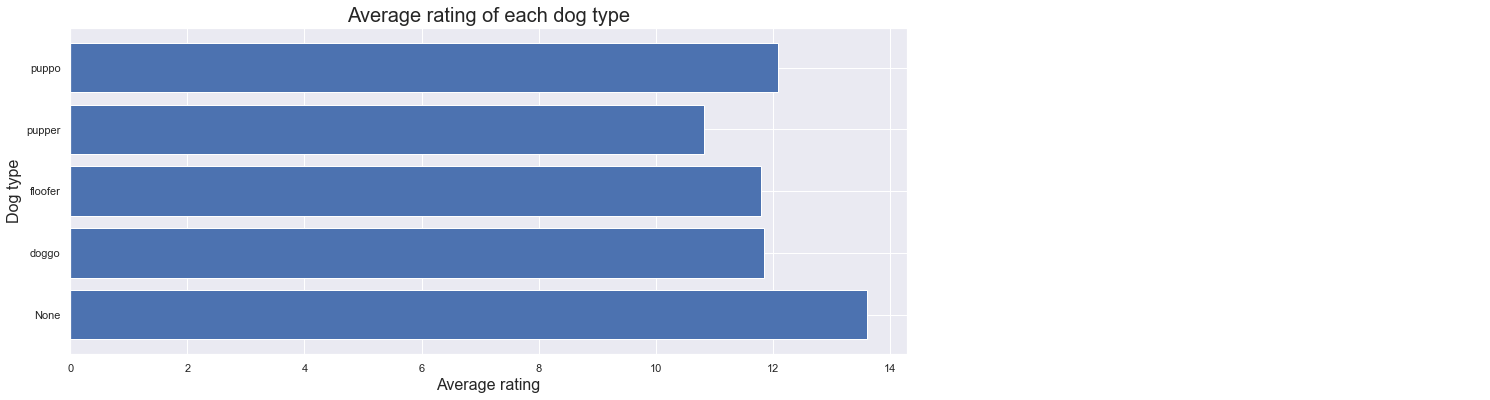

In [134]:
age_compare_bar(series = archive.groupby('dog_type')['rating_numerator'].mean(),
                xlabel = 'Average rating',
                ylabel = 'Dog type',
                title = 'Average rating of each dog type', add_annotate = '')

In [135]:
archive.groupby('dog_type')['retweet count'].median().sort_index().tail()

dog_type
None       1009.0
doggo      2284.0
floofer    2324.0
pupper     1005.5
puppo      2568.0
Name: retweet count, dtype: float64

In [136]:
archive.groupby('dog_type')['retweet count'].mean().sort_index().tail()

dog_type
None       2068.472817
doggo      5262.202703
floofer    3257.200000
pupper     2026.688034
puppo      5599.680000
Name: retweet count, dtype: float64

Let's analyze likability by looking for a relationship between retweet count and dog rating

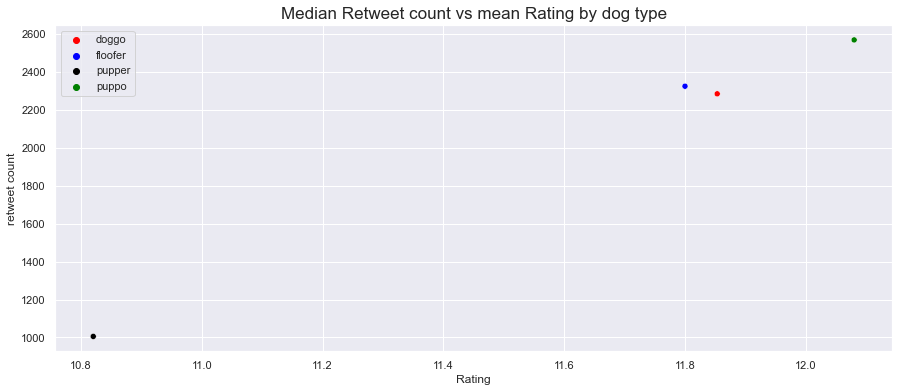

In [137]:
sns.scatterplot(x = archive.groupby('dog_type')['rating_numerator'].mean().sort_index().tail(4), 
                y = archive.groupby('dog_type')['retweet count'].median().sort_index().tail(4), 
                hue = archive.groupby('dog_type')['retweet count'].median().sort_index().tail(4).index.tolist(), 
               palette = ['red', 'blue', 'black', 'green']
           );

plt.title('Median Retweet count vs mean Rating by dog type', fontsize = 17)
plt.xlabel('Rating');

I'm using the median retweet count because the many outlier retweet counts will affect the mean. I didn't do so for the ratings because the mean and median values are almost the same (Except for dogs with unidentified dog type)

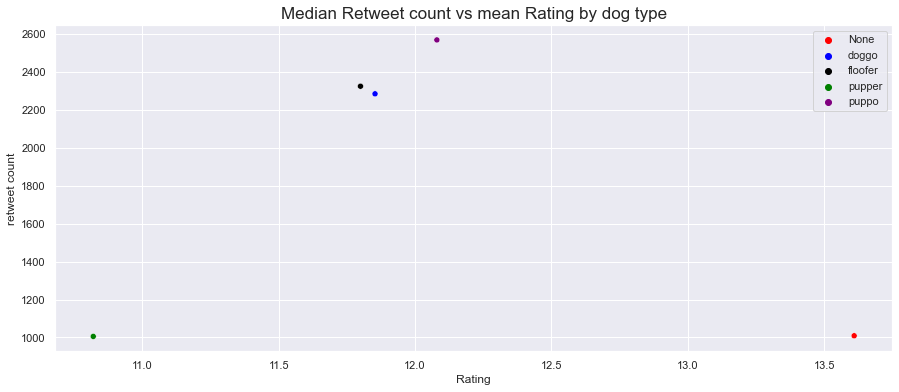

In [138]:
sns.scatterplot(x = archive.groupby('dog_type')['rating_numerator'].mean().sort_index(), 
                y = archive.groupby('dog_type')['retweet count'].median().sort_index(), 
                hue = archive.groupby('dog_type')['retweet count'].median().index.tolist(), 
               palette = ['red', 'blue', 'black', 'green', 'purple']);

plt.title('Median Retweet count vs mean Rating by dog type', fontsize = 17)
plt.xlabel('Rating');

In [139]:
(archive.groupby('dog_type')['rating_numerator'].mean().sort_index().tail(4)
 .corr(
     archive.groupby('dog_type')['retweet count'].median().sort_index().tail(4)
        )
 .round(3)
)

0.997

For identified dog types (dog type is not 'None'), the median retweet count seems to have a positive correlation with the average dog rating. Let's dig deeper

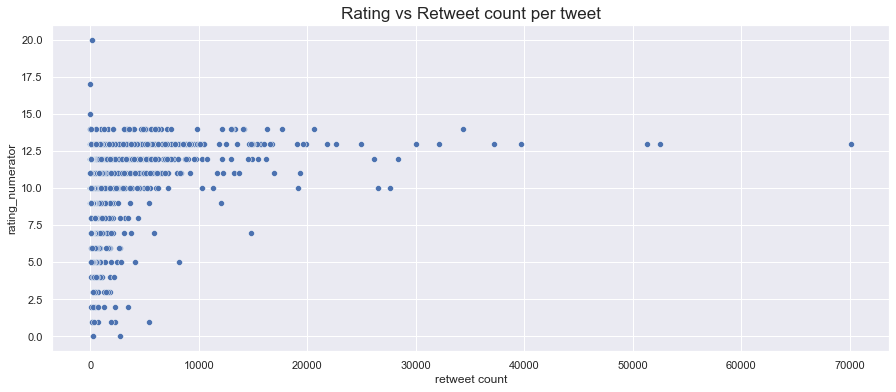

In [140]:
sns.scatterplot( x = archive['retweet count'],
                 y = archive['rating_numerator'][archive['rating_numerator']
                                                 .between(0, 20)],
                )

plt.title('Rating vs Retweet count per tweet', fontsize = 17);
# plt.axvline(x=36_000, color='red')


In [141]:
print("Correlation coefficient: ",
      (archive['rating_numerator'][archive['rating_numerator']
       .between(0, 20)]
       .corr(archive['retweet count'])
       .round(3)))

Correlation coefficient:  0.278


I use the 'between' function because the rating_numerator has lots of upper outliers that make it difficult to see anything meaningful.

From this plot, we see that the relationship is not as strong as it originally seemed. However, you will observe that the 5 highest retweeted tweets are in a straight line, I.e, they have the same rating. Let's investigate further.

In [142]:
archive[['rating_numerator', 'dog_type', 'retweet count']].sort_values(by = 'retweet count', ascending = False).head(10)

,rating_numerator,dog_type,retweet count
862,13.0,doggo,70123.0
901,13.0,doggo,52490.0
445,13.0,None,51282.0
348,13.0,puppo,39663.0
63,13.0,None,37176.0
374,14.0,doggo,34347.0
447,13.0,None,32152.0
119,13.0,pupper,30002.0
1587,12.0,None,28397.0
1651,10.0,None,27584.0


Indeed, 7 of the 10 tweets with the highest retweets are of rating 13. 

### Insights:

1. About 34% of the tweets in the data contained no dog names

2. 10, 11, 12 and 13 are the most popular dog ratings, with 12 being the most common. However,  7 of the 10 tweets with the highest retweets contain dogs rated 13

3. Pupper was the most common identified dog type

4. Tweets about puppos had the highest average number of retweets

5. For identified dog types, the median retweet count seems to have a positive correlation with the average dog rating



## Limitation

### Visualization

The entire dataset was not cleaned, so for example, more dogs whose names seem to not have been written, may actually have names